In [1]:
import zipfile
path = zipfile.ZipFile("/content/helmet-no-helmet.v1i.yolov11 (1).zip")

In [2]:
path. extractall()

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.6 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
pre_train = YOLO("yolo11n.pt")

In [ ]:
pre_train.train(data = "/content/data.yaml", epochs = 25)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

In [ ]:
pre_train.save("best.pt")

In [ ]:
model_save = YOLO("/content/best.pt")

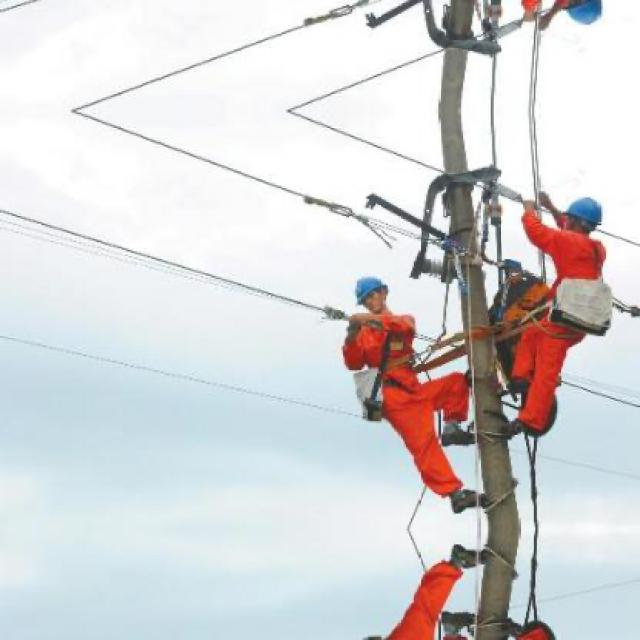

In [10]:
from IPython.display import Image
Image("/content/test/images/hard_hat_workers2161_png.rf.15d84bcebc741ded7f21800248127695.jpg")

In [11]:
pred = model_save.predict("/content/train/images/hard_hat_workers1016_png.rf.91cba6984c5977365ffffc862943b66a.jpg")


image 1/1 /content/train/images/hard_hat_workers1016_png.rf.91cba6984c5977365ffffc862943b66a.jpg: 640x640 4 heads, 15 helmets, 29.1ms
Speed: 7.8ms preprocess, 29.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


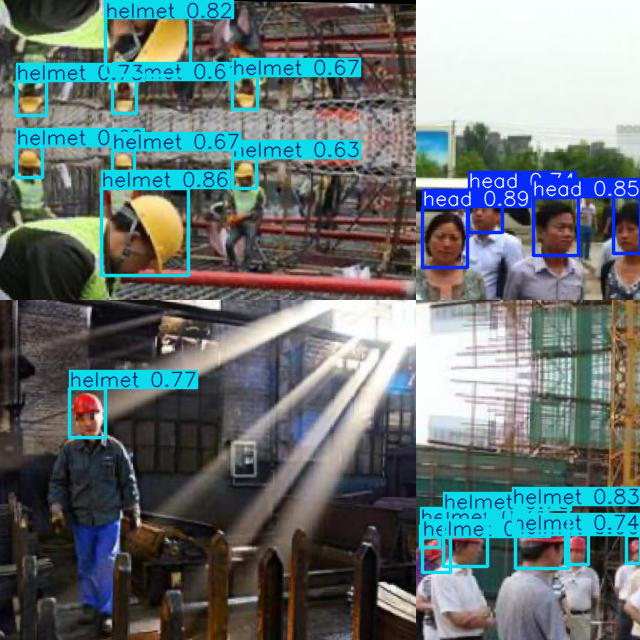

In [12]:
pred [0].show()

In [13]:
pred = model_save.predict("/content/train/images/hard_hat_workers1012_png.rf.bce9d83447fcbc755284a60154365fb3.jpg")


image 1/1 /content/train/images/hard_hat_workers1012_png.rf.bce9d83447fcbc755284a60154365fb3.jpg: 640x640 5 helmets, 28.3ms
Speed: 8.6ms preprocess, 28.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


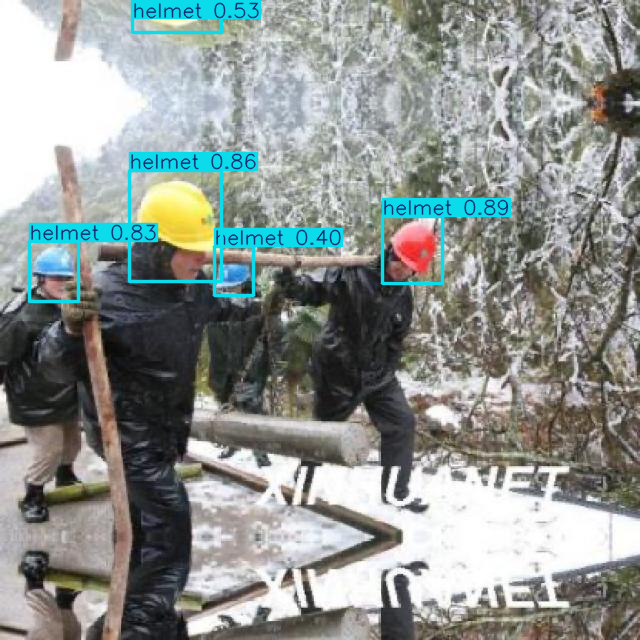

In [14]:
pred [0].show()


image 1/1 /content/train/images/hard_hat_workers2489_png.rf.26a1e3545eaca6685ed7a1e07f9a08de.jpg: 640x640 1 head, 5 helmets, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


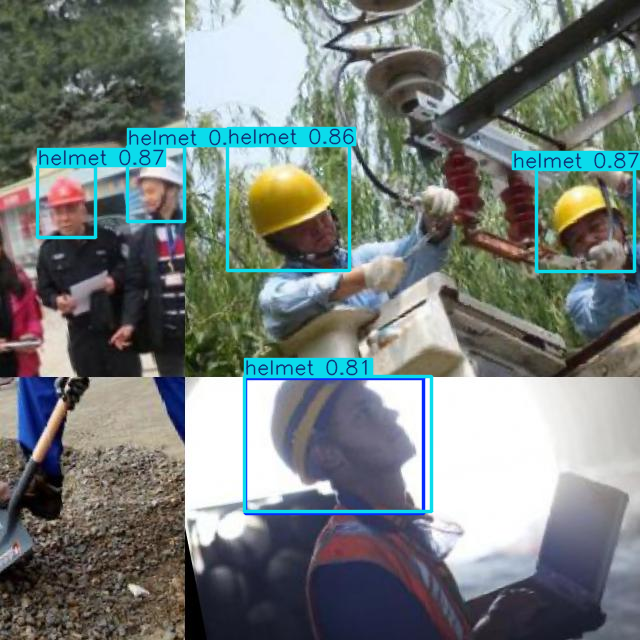

In [15]:
pred = model_save.predict("/content/train/images/hard_hat_workers2489_png.rf.26a1e3545eaca6685ed7a1e07f9a08de.jpg")
pred [0].show()

In [16]:
!pip install gradio

In [17]:
from PIL import Image
import gradio as gr
import numpy as np

In [18]:
def predict_image(img):
  results = model_save.predict(img)
  return results[0].plot()

In [19]:
iface = gr.Interface(fn=predict_image, inputs="image", outputs="image")
iface.launch(show_error=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://90800934afd6d23d80.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [20]:
from IPython.display import Video
Video("/content/2048246-hd_1920_1080_24fps.mp4")

In [22]:
model_save.predict("/content/2048246-hd_1920_1080_24fps.mp4", save=True)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/447) /content/2048246-hd_1920_1080_24fps.mp4: 384x640 4 helmets, 51.4ms
video 1/1 (frame 2/447) /content/2048246-hd_1920_1080_24fps.mp4: 384x640 2 helmets, 16.7ms
video 1/1 (frame 3/447) /content/2048246-hd_1920_1080_24fps.mp4: 384x640 2 helmets, 11.5ms
video 1/1 (frame 4/447) /content/2048246-hd_1920_1080_24fps.mp4: 384x640 2 helmets, 11.8ms
video 1/1 (frame 5/447) /content/2048246-hd_1920_1080_24fps.mp4: 384x640 2 helmets, 11.5ms
vid

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'head', 1: 'helmet', 2: 'person'}
 obb: None
 orig_img: array([[[188, 172, 162],
         [188, 172, 162],
         [188, 172, 162],
         ...,
         [153, 120,  89],
         [153, 120,  89],
         [153, 120,  89]],
 
        [[188, 172, 162],
         [188, 172, 162],
         [188, 172, 162],
         ...,
         [153, 120,  89],
         [153, 120,  89],
         [153, 120,  89]],
 
        [[188, 172, 162],
         [188, 172, 162],
         [188, 172, 162],
         ...,
         [153, 120,  89],
         [153, 120,  89],
         [153, 120,  89]],
 
        ...,
 
        [[ 13,  19,  43],
         [ 13,  19,  43],
         [ 13,  19,  43],
         ...,
         [ 33,  30,  29],
         [ 35,  32,  31],
         [ 35,  32,  31]],
 
        [[ 13,  19,  43],
         [ 13,  19,  43],
         [ 13,  19,  43],
        

In [23]:
model_save.predict("/content/WhatsApp Video 2025-12-23 at 9.23.14 PM.mp4", save=True)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/370) /content/WhatsApp Video 2025-12-23 at 9.23.14 PM.mp4: 384x640 1 head, 1 helmet, 10.8ms
video 1/1 (frame 2/370) /content/WhatsApp Video 2025-12-23 at 9.23.14 PM.mp4: 384x640 1 helmet, 8.6ms
video 1/1 (frame 3/370) /content/WhatsApp Video 2025-12-23 at 9.23.14 PM.mp4: 384x640 1 helmet, 9.0ms
video 1/1 (frame 4/370) /content/WhatsApp Video 2025-12-23 at 9.23.14 PM.mp4: 384x640 1 helmet, 9.1ms
video 1/1 (frame 5/370) /content/WhatsApp

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'head', 1: 'helmet', 2: 'person'}
 obb: None
 orig_img: array([[[241, 239, 230],
         [241, 239, 230],
         [241, 239, 230],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[241, 239, 230],
         [241, 239, 230],
         [241, 239, 230],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[241, 239, 230],
         [241, 239, 230],
         [241, 239, 230],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[ 90,  91,  96],
         [ 90,  91,  96],
         [ 90,  91,  96],
         ...,
         [ 98, 103, 109],
         [100, 105, 111],
         [100, 105, 111]],
 
        [[ 90,  91,  96],
         [ 90,  91,  96],
         [ 90,  91,  96],
        

In [24]:
model_save.predict("/content/istockphoto-2185884267-640_adpp_is.mp4", save=True)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/366) /content/istockphoto-2185884267-640_adpp_is.mp4: 384x640 1 head, 2 helmets, 9.0ms
video 1/1 (frame 2/366) /content/istockphoto-2185884267-640_adpp_is.mp4: 384x640 1 head, 2 helmets, 8.2ms
video 1/1 (frame 3/366) /content/istockphoto-2185884267-640_adpp_is.mp4: 384x640 1 head, 1 helmet, 8.6ms
video 1/1 (frame 4/366) /content/istockphoto-2185884267-640_adpp_is.mp4: 384x640 1 head, 1 helmet, 7.9ms
video 1/1 (frame 5/366) /content/ist

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'head', 1: 'helmet', 2: 'person'}
 obb: None
 orig_img: array([[[ 45, 101,  70],
         [ 44, 100,  69],
         [ 42,  96,  65],
         ...,
         [ 39,  74,  44],
         [ 42,  79,  49],
         [ 43,  80,  50]],
 
        [[ 45, 101,  70],
         [ 44, 100,  69],
         [ 42,  96,  65],
         ...,
         [ 41,  76,  46],
         [ 43,  80,  50],
         [ 46,  83,  53]],
 
        [[ 47, 101,  70],
         [ 46, 100,  69],
         [ 44,  96,  65],
         ...,
         [ 42,  77,  47],
         [ 43,  80,  50],
         [ 46,  83,  53]],
 
        ...,
 
        [[134, 130, 133],
         [133, 129, 132],
         [134, 130, 133],
         ...,
         [219, 191, 191],
         [228, 200, 200],
         [234, 206, 206]],
 
        [[133, 129, 132],
         [133, 129, 132],
         [134, 130, 133],
        